In [ ]:
df.info()
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000


Analyzing column: longitude
Analyzing column: latitude
Analyzing column: housing_median_age
Analyzing column: total_rooms


IndexError: index 9 is out of bounds for axis 0 with size 9

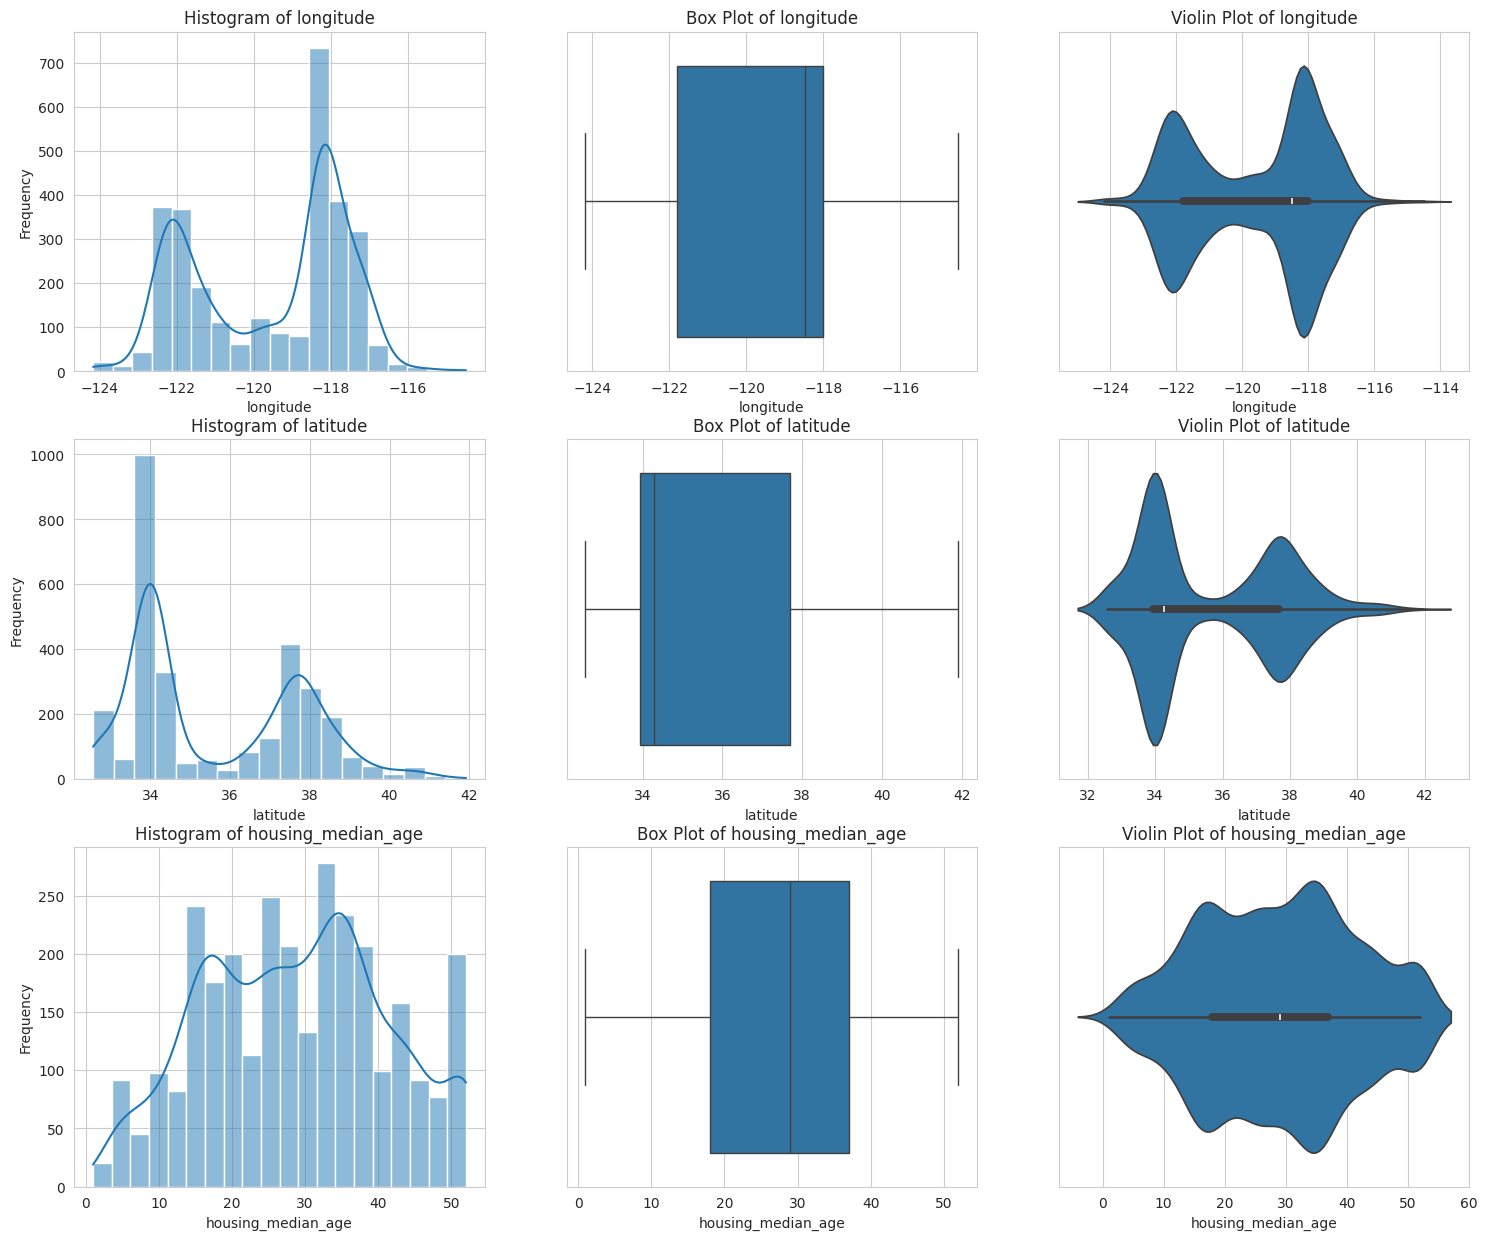

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
continuous_cols = df.columns
n_cols = 3
n_rows = (len(continuous_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
axes = axes.flatten()
for i, col in enumerate(continuous_cols):
    print(f"Analyzing column: {col}")

    ax_index = i * n_cols


    sns.histplot(data=df, x=col, kde=True, ax=axes[ax_index])
    axes[ax_index].set_title(f'Histogram of {col}')
    axes[ax_index].set_xlabel(col)
    axes[ax_index].set_ylabel('Frequency')


    sns.boxplot(data=df, x=col, ax=axes[ax_index + 1])
    axes[ax_index + 1].set_title(f'Box Plot of {col}')
    axes[ax_index + 1].set_xlabel(col)


    sns.violinplot(data=df, x=col, ax=axes[ax_index + 2])
    axes[ax_index + 2].set_title(f'Violin Plot of {col}')
    axes[ax_index + 2].set_xlabel(col)


for j in range(i * n_cols + 3, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns

if len(categorical_cols) > 0:
    print("Categorical columns found. Generating count plots:")
    for col in categorical_cols:
        print(f"Analyzing column: {col}")
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=col)
        plt.title(f'Count Plot of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
else:
    print("No categorical columns found in the DataFrame.")

No categorical columns found in the DataFrame.


In [ ]:

Q1 = df['total_rooms'].quantile(0.25)
Q3 = df['total_rooms'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_total_rooms = df[(df['total_rooms'] < lower_bound) | (df['total_rooms'] > upper_bound)]

print(f"Number of outliers in 'total_rooms' using IQR method: {len(outliers_total_rooms)}")
print("\nData types after cleaning (no changes made as all were float64):")
print(df.dtypes)

Number of outliers in 'total_rooms' using IQR method: 182

Data types after cleaning (no changes made as all were float64):
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object


### Data Loading
This cell imports the pandas library and loads the dataset into a DataFrame.

In [ ]:
import pandas as pd
df = pd.read_csv('/content/sample_data/california_housing_test.csv')
display(df.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [ ]:


Q1 = df['total_rooms'].quantile(0.25)
Q3 = df['total_rooms'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_total_rooms = df[(df['total_rooms'] < lower_bound) | (df['total_rooms'] > upper_bound)]

print(f"Number of outliers in 'total_rooms' using IQR method: {len(outliers_total_rooms)}")
print("\nData types after cleaning (no changes made as all were float64):")
print(df.dtypes)

Number of outliers in 'total_rooms' using IQR method: 182

Data types after cleaning (no changes made as all were float64):
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object


,TransactionID,product,quantity,price,Date,category
0,101,A,2,10.99,2023-08-01,Electronics
1,102,B,1,8.99,2023-08-02,Clothing
2,103,A,3,12.99,2023-08-01,Electronics
3,104,C,2,9.99,2023-08-03,Books
4,105,B,1,7.99,2023-08-02,Clothing


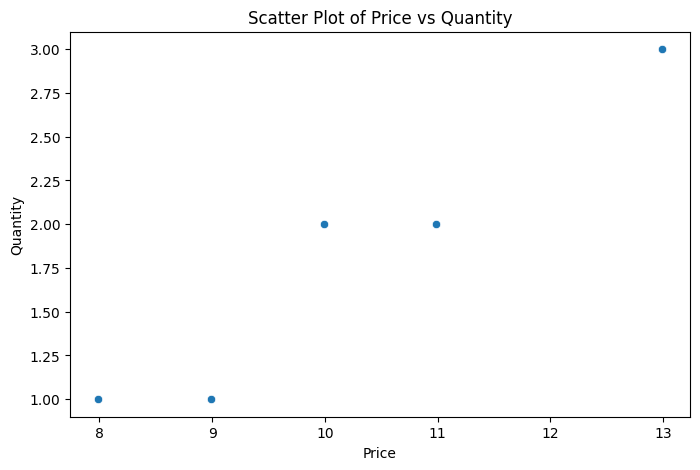


Sorted DataFrame:
   TransactionID product  quantity  price       Date     category
0            101       A         2  10.99 2023-08-01  Electronics
2            103       A         3  12.99 2023-08-01  Electronics
1            102       B         1   8.99 2023-08-02     Clothing
4            105       B         1   7.99 2023-08-02     Clothing
3            104       C         2   9.99 2023-08-03        Books


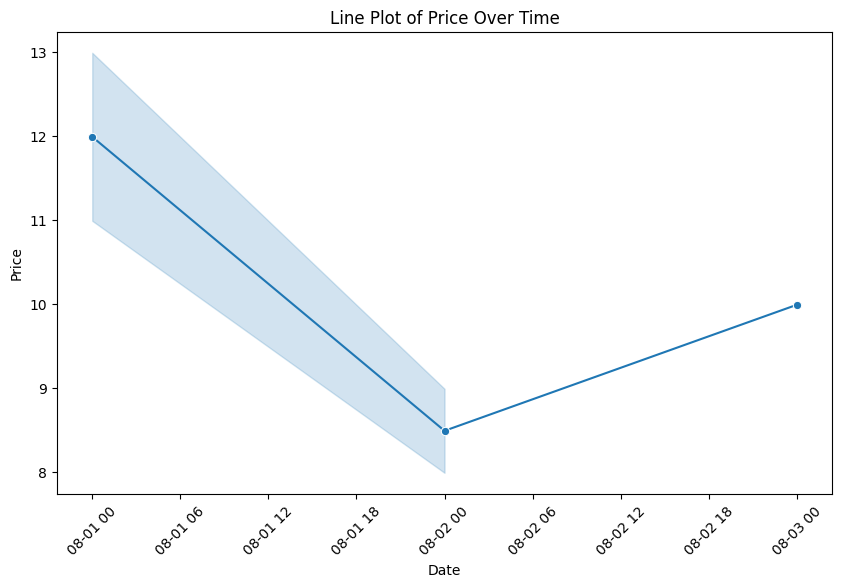

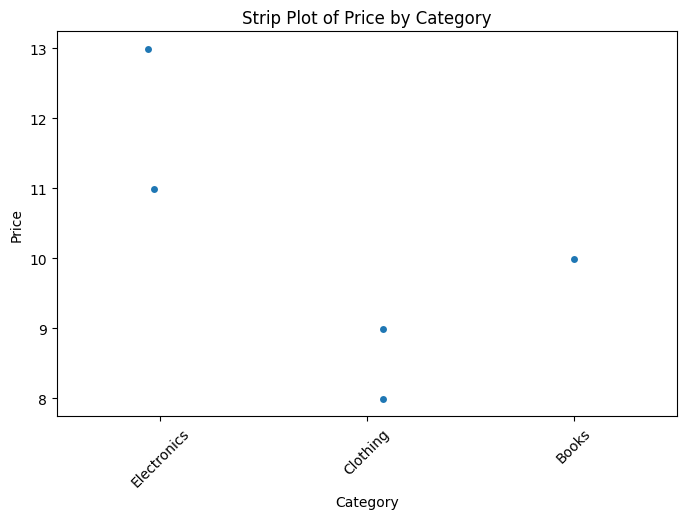

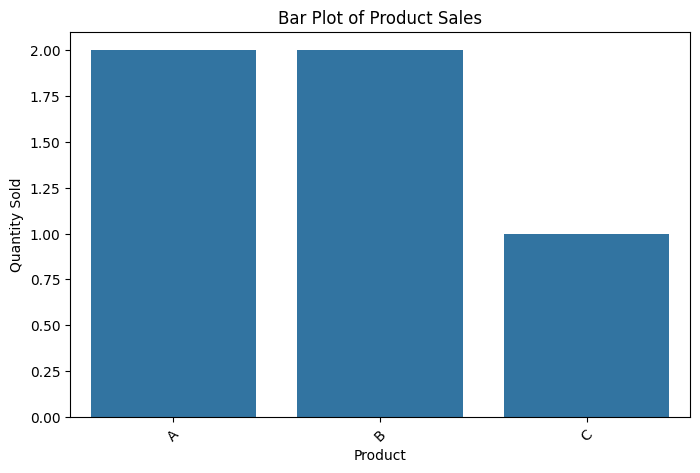

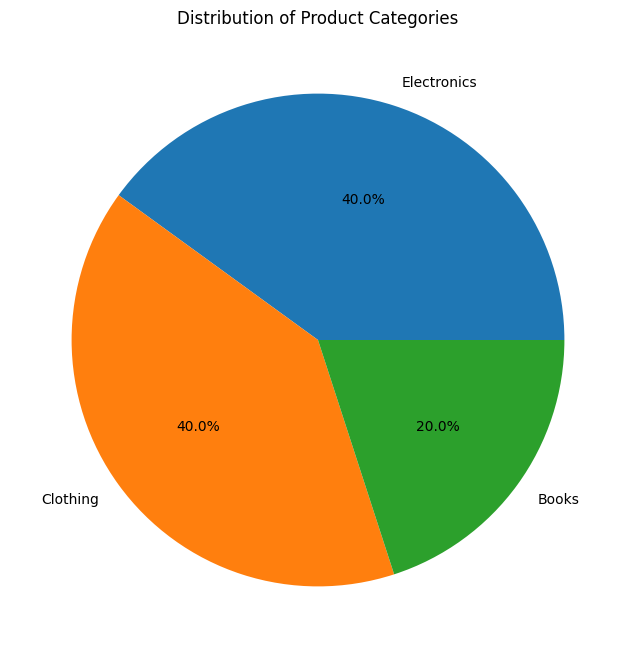

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sales_data={
    "TransactionID":[101,102,103,104,105],
    "product":["A","B","A","C","B"],
    "quantity":[2,1,3,2,1],
    "price":[10.99,8.99,12.99,9.99,7.99],
    "Date":["2023-08-01","2023-08-02","2023-08-01","2023-08-03","2023-08-02"],
    "category":["Electronics","Clothing","Electronics","Books","Clothing"]
}
df=pd.DataFrame(sales_data)
display(df)
#scatterplot
plt.figure(figsize=(8,5))
sns.scatterplot(x="price",y="quantity",data=df)
plt.title("Scatter Plot of Price vs Quantity")
plt.xlabel("Price")
plt.ylabel("Quantity")
plt.show()
#lineplot
df['Date']=pd.to_datetime(df['Date'])
df_sorted=df.sort_values(by="Date")
print("\nSorted DataFrame:")
print(df_sorted)
plt.figure(figsize=(10,6))
sns.lineplot(x="Date",y="price",data=df_sorted,marker="o")
plt.title("Line Plot of Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()
#stripplot
plt.figure(figsize=(8,5))
sns.stripplot(x="category",y="price",data=df,jitter=True)
plt.title("Strip Plot of Price by Category")
plt.xlabel("Category")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()
#categorical
#barplot
plt.figure(figsize=(8,5))
product_counts=df["product"].value_counts()
sns.barplot(x=product_counts.index,y=product_counts.values)
plt.title("Bar Plot of Product Sales")
plt.xlabel("Product")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)
plt.show()
#pie chart
category_counts=df["category"].value_counts()
plt.figure(figsize=(8,8))
plt.pie(category_counts.values,labels=category_counts.index,autopct="%1.1f%%")
plt.title("Distribution of Product Categories")
plt.show()


In [ ]:
import pandas as pd
data={
    "StudentID":[1,2,3,4,5],
    "Name":["Alice","Bob","Charlie","Diana","Edward"],
    "Age":[15,16,15,17,16],
    "Math_score":[85,90,78,92,88],
    "English_score":[89,84,76,91,87],
    "Science_score":[92,88,85,90,89]
}
df=pd.DataFrame(data)
display(df)
print("missing values:")
print(df.isnull().sum())
print("unique ages:",df['Age'].unique())

,StudentID,Name,Age,Math_score,English_score,Science_score
0,1,Alice,15,85,89,92
1,2,Bob,16,90,84,88
2,3,Charlie,15,78,76,85
3,4,Diana,17,92,91,90
4,5,Edward,16,88,87,89


missing values:
StudentID        0
Name             0
Age              0
Math_score       0
English_score    0
Science_score    0
dtype: int64
unique ages: [15 16 17]
